# Testing the fraction Levy motion generation

Verify that flm generated by `flm` exhibits the correct scaling. In particular, the increments in the generated data should follow a Levy stable distribution, and the width paramater C should scale with Hurst coefficient H as the lag is increased.

In [1]:
from flm import flm
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Levy probability density function by numerical integration
def L(z, alpha, gamma=1):
    
    f = lambda q : 1.0 / np.pi * np.exp(-np.power(gamma * q, alpha)) * np.cos(q * z)

    integral, err = quad(f, 0, np.inf)
    return integral

## 1D flm

Generate a 1D flm data set.

In [3]:
alpha = 1.5
H = 0.1
n = 15
data = flm(alpha, H, n, dim = 1, nm=10)

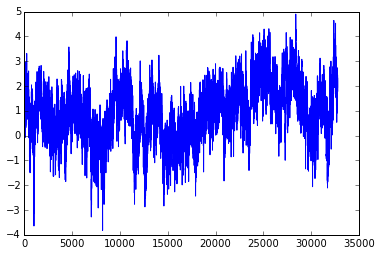

In [4]:
plt.plot(data)

Estimate the Levy width C using the method of Fama and Roll, Parameter Estimates for Symmetric Stable Distributions, Journal of the American Statistical Association, Vol. 66, No. 334 (Jun., 1971)

In [5]:
# The increments (difference between succesive values)
increments = np.diff(data)

def width(x):
    # The 0.28 and 0.72 percentiles
    q28 = np.percentile(x, 28)
    q72 = np.percentile(x, 72)

    return (q72 - q28) / 1.654

C = width(increments)

Plot the pdf of the increments, as well as the numerical pdf for a Levy stable distribution with width estimated above

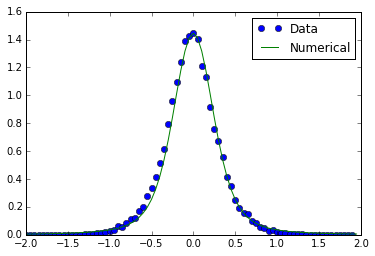

In [6]:
x = np.arange(-2, 2, 0.05)
y = np.zeros(x.size)

for i in range(0, x.size):
    y[i] = L(x[i], alpha, C)
    
bins = np.arange(-2, 2, 0.05);
hist, bin_edges = np.histogram(increments, bins, normed=True)

plt.plot(bin_edges[0:len(hist)], hist, 'o', label='Data');
plt.plot(x, y, label='Numerical')
plt.legend()

Estimate the width parameter C for various lags in the increments

In [7]:
lags = np.array((1, 2, 4, 10))
cs = np.array((width(np.diff(data)), width(np.diff(data[::2])), width(np.diff(data[::4])),
               width(np.diff(data[::10]))))

Fit a model to the data $C = a l^H$

In [8]:
def fit(x, a, b):
    return a * x**b

popt, pcov = curve_fit(fit, lags, cs)
popt

array([ 0.23303612,  0.26657509])

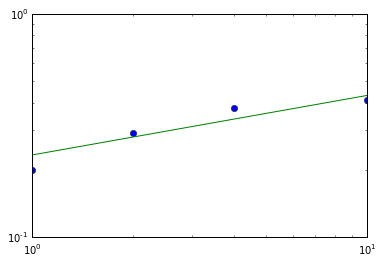

In [9]:
plt.plot(lags, cs, 'o')
plt.plot(lags, fit(lags, *popt))
plt.xscale('log')
plt.yscale('log')

## 2D flm

In [10]:
alpha = 1.25
H = 0.3
n = 8
data = flm(alpha, H, n, dim = 2, nm=10)

<matplotlib.colorbar.Colorbar instance at 0x11a6a4b90>

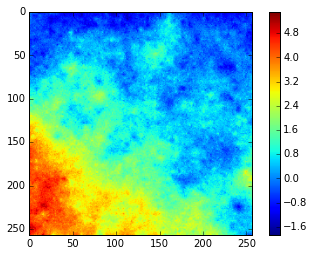

In [11]:
fig, ax = plt.subplots()
img1 = ax.imshow(data)
fig.colorbar(img1, ax=ax)

## 3D flm

In [24]:
alpha = 1.25
H = 0.3
n = 5
data = flm(alpha, H, n, dim = 3, nm=10)

<matplotlib.colorbar.Colorbar instance at 0x11c019710>

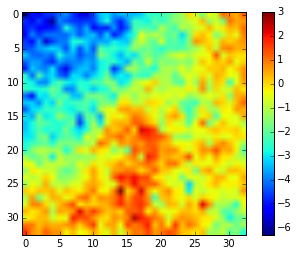

In [27]:
fig, ax = plt.subplots()
img1 = ax.imshow(data[30])
fig.colorbar(img1, ax=ax)